<a href="https://colab.research.google.com/github/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/blob/main/Diabetes_Prediction_System_(DT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [33]:
url = 'https://raw.githubusercontent.com/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/refs/heads/main/diabetes_prediction_dataset.csv'
Diabetes_dataset = pd.read_csv(url)

In [34]:
Diabetes_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [35]:
Diabetes_dataset.shape

(100000, 9)

In [36]:
print(" Summary Statistics:")
print(Diabetes_dataset.describe())

 Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         

In [37]:
print(" Diabetes Class Distribution (in %):")
print(Diabetes_dataset['diabetes'].value_counts(normalize=True) * 100)
print(Diabetes_dataset['diabetes'].value_counts())

 Diabetes Class Distribution (in %):
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64
diabetes
0    91500
1     8500
Name: count, dtype: int64


In [38]:
# Value counts for categorical variables
print(" Gender Distribution:")
print(Diabetes_dataset['gender'].value_counts())

 Gender Distribution:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [39]:
print(" Smoking History Distribution:")
print(Diabetes_dataset['smoking_history'].value_counts())

 Smoking History Distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [40]:
print(Diabetes_dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [41]:
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [42]:
x = Diabetes_dataset.drop('diabetes', axis=1)  # Features (independent variables)
y = Diabetes_dataset['diabetes']              # Label (dependent variable)


In [43]:
x.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
5,Female,20.0,0,0,never,27.32,6.6,85
6,Female,44.0,0,0,never,19.31,6.5,200
7,Female,79.0,0,0,No Info,23.86,5.7,85
8,Male,42.0,0,0,never,33.64,4.8,145
9,Female,32.0,0,0,never,27.32,5.0,100


In [44]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [45]:
le = LabelEncoder()

# Detect categorical columns (like gender, smoking_history, etc.)
cat_cols = x.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Apply Label Encoding to each categorical column
for col in cat_cols:
    x[col] = le.fit_transform(x[col])


Categorical columns: Index(['gender', 'smoking_history'], dtype='object')


In [46]:
x.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
5,0,20.0,0,0,4,27.32,6.6,85
6,0,44.0,0,0,4,19.31,6.5,200
7,0,79.0,0,0,0,23.86,5.7,85
8,1,42.0,0,0,4,33.64,4.8,145
9,0,32.0,0,0,4,27.32,5.0,100


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
x_train.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,4,24.60,5.7,145
44966,0,38.0,0,0,2,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,1,22.11,4.5,85


In [49]:
x_test.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,13.0,0,0,0,20.82,5.8,126
80184,0,3.0,0,0,0,21.00,5.0,145
19864,1,63.0,0,0,3,25.32,3.5,200
76699,0,2.0,0,0,4,17.43,6.1,126
92991,0,33.0,0,0,5,40.08,6.2,200


In [50]:
y_train.head(5)

,diabetes
75220,0
48955,1
44966,0
13568,0
92727,0


In [51]:
y_test.head(5)

,diabetes
75721,0
80184,0
19864,0
76699,0
92991,1


**Decision tree**

In [52]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [53]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
y_pred = dt_model.predict(x_test)

In [55]:
result = dt_model.predict([[0, 33, 0, 0, 5, 60, 7.2, 180]])
print(result)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
result = dt_model.predict([[1, 35, 1, 0, 1, 24, 5, 80]])
print(result)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Evaluating the model**

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = log_loss(y_test, y_pred)
print("log loss:", accuracy)

Accuracy: 0.95305
log loss: 1.6922495266190505


In [58]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.75      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



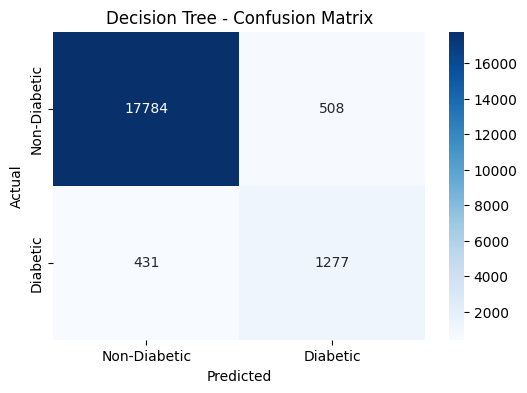

In [31]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Visualisation**

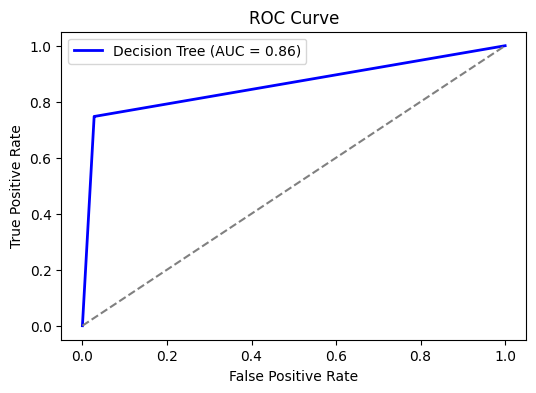

In [59]:
y_probs = dt_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()